In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
data1=pd.read_csv(r"WorldCupMatches (1).csv")
data2=pd.read_csv(r"WorldCupPlayers.csv")
data3=pd.read_csv(r"WorldCups.csv")

In [45]:
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [46]:
data2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [47]:
data3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [48]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [49]:
data_countries = pd.DataFrame(data3['Winner'].value_counts())
data_countries

,count
Winner,
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2
England,1
France,1
Spain,1
Germany,1


In [50]:
# Insight 1 : Brazil has won the tournament most number of times

<Axes: title={'center': 'Countries Who Have Won World Cups'}, xlabel='Winner'>

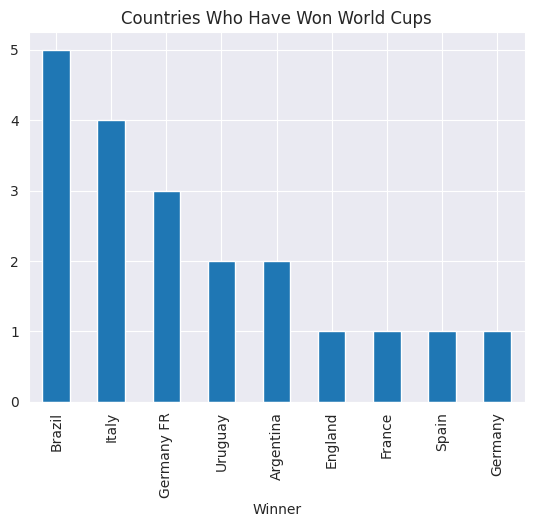

In [51]:
# Group by 'Winner' column and count the occurrences of each country
winners_count = data3['Winner'].value_counts()

# Plot the results
winners_count.plot(kind='bar', title='Countries Who Have Won World Cups')

In [52]:
# Now collaborating for first three positions we are having
data_winner=pd.DataFrame(data3['Winner'].value_counts())
data_runner_up=pd.DataFrame(data3['Runners-Up'].value_counts())
data_third=pd.DataFrame(data3['Third'].value_counts())

In [53]:
data_winner.head()

,count
Winner,
Brazil,5
Italy,4
Germany FR,3
Uruguay,2
Argentina,2


In [54]:
data_runner_up.head()

,count
Runners-Up,
Argentina,3
Germany FR,3
Netherlands,3
Czechoslovakia,2
Hungary,2


In [55]:
data_third.head()

,count
Third,
Germany,3
Brazil,2
Sweden,2
France,2
Poland,2


In [56]:
teams = pd.concat([data_winner, data_runner_up, data_third], axis = 1)
teams

,count,count,count
Brazil,5.0,2.0,2.0
Italy,4.0,2.0,1.0
Germany FR,3.0,3.0,1.0
Uruguay,2.0,NaN,NaN
Argentina,2.0,3.0,NaN
England,1.0,NaN,NaN
France,1.0,1.0,2.0
Spain,1.0,NaN,NaN
Germany,1.0,1.0,3.0
Netherlands,NaN,3.0,1.0


In [57]:
# Dealing with NaN values

teams.fillna(0,inplace=True)

In [58]:
teams=teams.astype(int)

In [59]:
# Insight 2 : A complete depection of number of world cups won, first runner-up, and second runner-up positions by various participating
# teams

teams.iplot(kind='bar',yTitle='Count',title='Country wise  analysis',xTitle='Country')

In [60]:
# NUMBER OF GOALS PER COUNTRY
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [61]:
# Seperating data based on goals scored by teams
data_home=data1[['Home Team Name','Home Team Goals']].dropna()
data_away=data1[['Away Team Name','Away Team Goals']].dropna()

In [62]:
data_home.head()

,Home Team Name,Home Team Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0


In [64]:
data_away.head()

,Away Team Name,Away Team Goals
0,Mexico,1.0
1,Belgium,0.0
2,Brazil,1.0
3,Peru,1.0
4,France,0.0


In [66]:
# Setting up the columns in both the tables
data_home.columns= ['Countries','Goals']
data_away.columns= ['Countries','Goals']
data_country_goals = pd.concat([data_home, data_away], ignore_index=True)
data_country_goals

,Countries,Goals
0,France,4.0
1,USA,3.0
2,Yugoslavia,2.0
3,Romania,3.0
4,Argentina,1.0
...,...,...
1699,Costa Rica,0.0
1700,Germany,7.0
1701,Argentina,0.0
1702,Netherlands,3.0


In [67]:
# The above table do contain all the goals both home and away but con have different values for same countries, so...

data_final_country_goal=data_country_goals.groupby('Countries').sum()
# Arranging by number of goals
final_data=data_final_country_goal.sort_values(by='Goals',ascending=False)
final_data=final_data[:10]
final_data

,Goals
Countries,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0
Germany,104.0
Spain,92.0
Netherlands,91.0
Hungary,87.0


In [68]:
# Insight 3 : Brazil scored the most number of goals thrughout the history of worldcup followed by Argentina and Germany.
final_data.iplot(kind='bar',yTitle='No of Goals',title='Countries with maximum number of goals',colors='red',xTitle='Country')
# Comparing half time home goals scored and half time away goals scored

half_team_home=pd.DataFrame(data1[['Home Team Name','Half-time Home Goals']])
half_team_away=pd.DataFrame(data1[['Away Team Name','Half-time Away Goals']])
half_team_home = half_team_home.groupby('Home Team Name').sum()
half_team_home = half_team_home.sort_values(by='Half-time Home Goals',ascending=False)
half_team_home

,Half-time Home Goals
Home Team Name,
Brazil,66.0
Argentina,48.0
Germany FR,38.0
Italy,36.0
Hungary,33.0
...,...
Norway,0.0
Iran,0.0
New Zealand,0.0


In [69]:
half_team_away = half_team_away.groupby('Away Team Name').sum()
half_team_away = half_team_away.sort_values(by='Half-time Away Goals',ascending=False)
half_team_away

,Half-time Away Goals
Away Team Name,
Spain,20.0
Germany,18.0
Netherlands,18.0
France,17.0
Brazil,17.0
...,...
China PR,0.0
Dutch East Indies,0.0
Slovenia,0.0


In [70]:
# Concatinating both the tables on team name
total = pd.concat([half_team_home, half_team_away], axis = 1)
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17.0
Argentina,48.0,8.0
Germany FR,38.0,12.0
Italy,36.0,13.0
Hungary,33.0,7.0
...,...,...
Egypt,NaN,2.0
Israel,NaN,0.0
Kuwait,NaN,0.0
El Salvador,NaN,0.0


In [71]:
# Creating total goals columns to order the table based on total number of goals scored by a team
total['total_goals'] = total['Half-time Home Goals'] + total['Half-time Away Goals']
total = total.sort_values(by= 'total_goals',ascending=False)
total=total[:10]
total

,Half-time Home Goals,Half-time Away Goals,total_goals
Brazil,66.0,17.0,83.0
Argentina,48.0,8.0,56.0
Germany FR,38.0,12.0,50.0
Italy,36.0,13.0,49.0
Germany,28.0,18.0,46.0
France,25.0,17.0,42.0
Hungary,33.0,7.0,40.0
Netherlands,19.0,18.0,37.0
Spain,16.0,20.0,36.0
Uruguay,27.0,6.0,33.0


In [72]:
# We don't require total_goals anymore, so...
total.pop('total_goals')
total

,Half-time Home Goals,Half-time Away Goals
Brazil,66.0,17.0
Argentina,48.0,8.0
Germany FR,38.0,12.0
Italy,36.0,13.0
Germany,28.0,18.0
France,25.0,17.0
Hungary,33.0,7.0
Netherlands,19.0,18.0
Spain,16.0,20.0
Uruguay,27.0,6.0


In [73]:
# Insight 4 : Brazil has again scored a majority of total goals playing as home team whereas spain scored more goals playing as away
# country rather than home country
total.iplot(kind='bar',yTitle='Count',title='Country wise analysis',xTitle='Country')
# Match outcomes by home and away teams
data1.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [74]:
# We didn't considered draw matches here because in many cells we had NaN values given which corresponded to 0 values and could
# had made our pie chart biased.

def winner(data1):
    if data1['Home Team Goals'] > data1['Away Team Goals']:
        return 'Home team won'
    elif data1['Home Team Goals'] < data1['Away Team Goals']:
        return 'Away Team won'

data1['winner']=data1.apply(lambda x:winner(x),axis=1)
data1['winner'].value_counts()

winner
Home team won    488
Away Team won    174
Name: count, dtype: int64

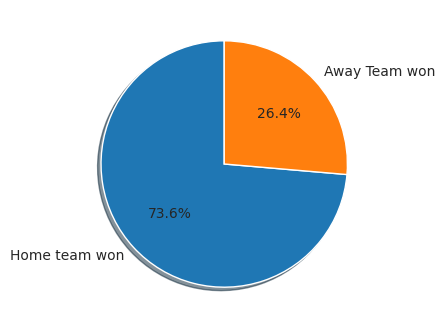

In [75]:
labels=['Home team won','Away Team won']
sizes=[486,174]
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0.1, 0, 0)
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True,
      startangle = 90)

plt.show()

In [76]:
# Insight 5 : 73.6 % of the matches were won by home team while 26.4 % were won by away team.
data2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [77]:
# Team Initials and Number Of Players Played Analysis
data2['Team Initials'].unique()

array(['FRA', 'MEX', 'USA', 'BEL', 'YUG', 'BRA', 'ROU', 'PER', 'ARG',
       'CHI', 'BOL', 'PAR', 'URU', 'AUT', 'HUN', 'EGY', 'SUI', 'NED',
       'SWE', 'GER', 'ESP', 'ITA', 'TCH', 'INH', 'CUB', 'NOR', 'POL',
       'ENG', 'SCO', 'FRG', 'TUR', 'KOR', 'URS', 'WAL', 'NIR', 'COL',
       'BUL', 'PRK', 'POR', 'ISR', 'MAR', 'SLV', 'GDR', 'AUS', 'ZAI',
       'HAI', 'TUN', 'IRN', 'CMR', 'NZL', 'ALG', 'HON', 'KUW', 'CAN',
       'IRQ', 'DEN', 'UAE', 'CRC', 'IRL', 'KSA', 'RUS', 'GRE', 'NGA',
       'RSA', 'JPN', 'JAM', 'CRO', 'SEN', 'SVN', 'ECU', 'CHN', 'TRI',
       'CIV', 'SCG', 'ANG', 'CZE', 'GHA', 'TOG', 'UKR', 'SRB', 'SVK',
       'BIH'], dtype=object)

In [78]:
data_nat = pd.DataFrame(data2[['Team Initials','Player Name']])
data_nat.head()

,Team Initials,Player Name
0,FRA,Alex THEPOT
1,MEX,Oscar BONFIGLIO
2,FRA,Marcel LANGILLER
3,MEX,Juan CARRENO
4,FRA,Ernest LIBERATI


In [79]:
d2 = pd.DataFrame(data_nat['Team Initials'].value_counts())
d2

,count
Team Initials,
BRA,2403
ITA,1843
ARG,1807
ENG,1378
FRG,1364
...,...
KUW,66
CAN,66
UAE,66


In [80]:
print(d2.columns)

Index(['count'], dtype='object')


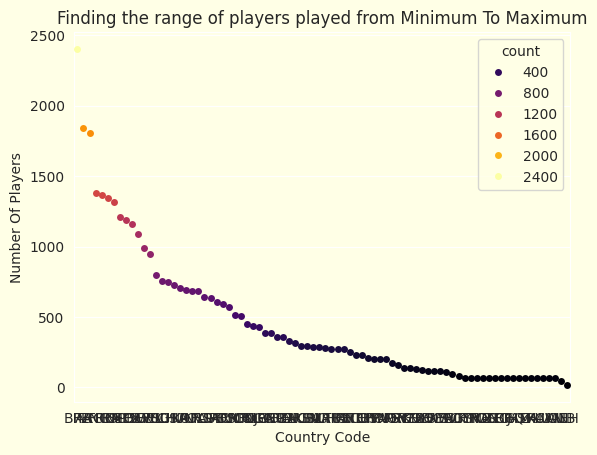

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"

# Create a swarmplot without specifying hue
p2 = sns.swarmplot(x='Team Initials', y='count', data=d2, hue='count', palette='inferno')
plt.title('Finding the range of players played from Minimum To Maximum')
plt.xlabel('Country Code')
plt.ylabel('Number Of Players')
plt.show()

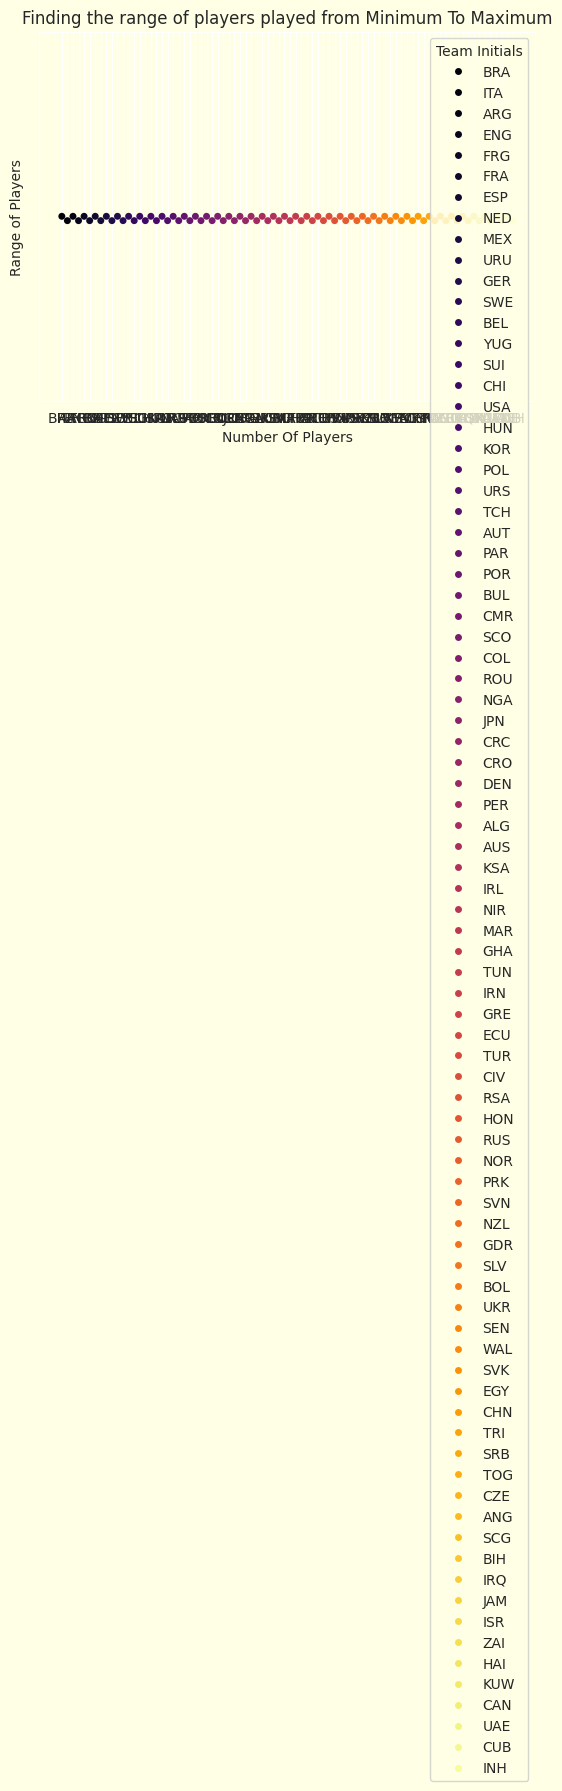

In [82]:
d2.iplot(kind='bar',yTitle='No of players',title='Country codes vs number of players played',colors='blue',xTitle='Country code')

# Insight 6 : Brazil has played the most bnumber of players followed by Italy and Argentina
# BUILDING BEE SWARM PLOT FOR NUMBER OF PLAYERS AND FINDING MINIMUM AND MAXIMUM RANGE
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
p2 = sns.swarmplot( x = 'Team Initials', data = d2 , hue='Team Initials', palette='inferno')
plt.title('Finding the range of players played from Minimum To Maximum')
plt.xlabel('Number Of Players')
plt.ylabel('Range of Players')
plt.show()

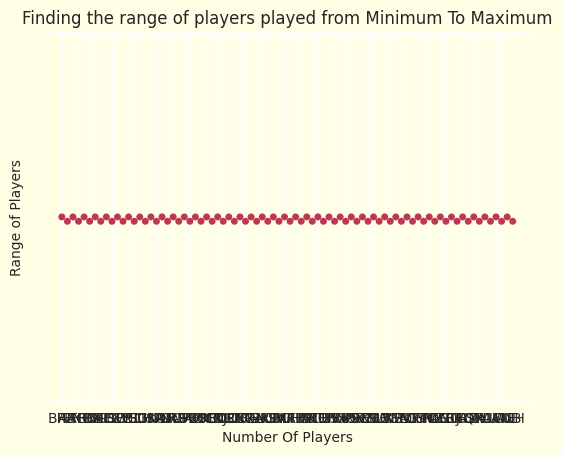

In [83]:
d2.iplot(kind='bar',yTitle='No of players',title='Country codes vs number of players played',colors='blue',xTitle='Country code')

# Insight 6 : Brazil has played the most bnumber of players followed by Italy and Argentina
# BUILDING BEE SWARM PLOT FOR NUMBER OF PLAYERS AND FINDING MINIMUM AND MAXIMUM RANGE
plt.rcParams['figure.facecolor'] = "#ffffe6"
plt.rcParams['axes.facecolor'] = "#ffffe6"
p2 = sns.swarmplot( x = 'Team Initials', data = d2 , palette='inferno')
plt.title('Finding the range of players played from Minimum To Maximum')
plt.xlabel('Number Of Players')
plt.ylabel('Range of Players')
plt.show()